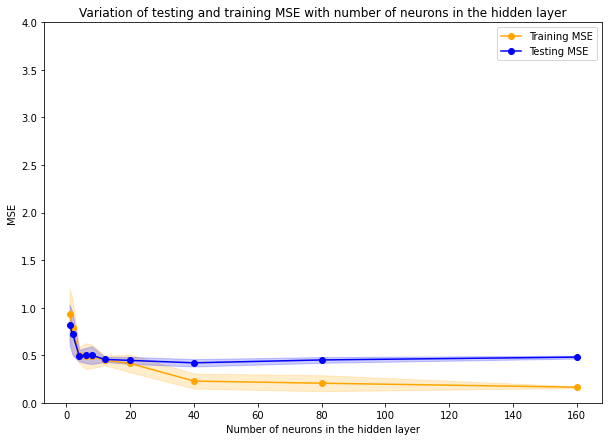

In [63]:
%run HW2_NN_regression_main.py

C:\Users\woege\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\woege\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\woege\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\woege\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\woege\Anaconda3\lib\site-packages\sklearn\neural_network\_multilaye

Accuracy of test data: [0.8896 0.8883 0.8876 0.8883 0.8878]
Accuracy of test data: [0.96491667 0.96491667 0.961      0.9648     0.96525   ]


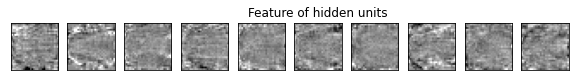

Confusion Matrix:
[[813   1  20  20   3   1 136   0   6   0]
 [  5 973   1  14   3   0   4   0   0   0]
 [ 12   1 850   6  60   1  69   0   1   0]
 [ 20   4  20 886  31   1  32   0   6   0]
 [  1   0 124  27 764   0  82   0   2   0]
 [  0   0   0   1   0 966   0  14   3  16]
 [101   2  90  25  37   0 738   0   7   0]
 [  0   0   0   0   0  16   0 960   0  24]
 [  3   0   9   3   2   7   6   2 967   1]
 [  0   0   0   0   0  11   1  27   0 961]]


In [1]:
%run HW2_NN_classification_main.py

In [1]:
%matplotlib inline

In [58]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import warnings
import sys

from HW2_NN_regression_plot import plot_mse_vs_neurons, plot_mse_vs_iterations, \
    plot_learned_function, plot_mse_vs_alpha

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

"""
Assignment 2: Neural networks
Part 3.1: Regression with neural networks

This file contains functions to train and test the neural networks corresponding the the questions in the assignment,
as mentioned in comments in the functions.
Fill in all the sections containing TODOs.
"""


def calculate_mse(nn, x, y):
    """
    Calculates the mean squared error on the training and test data given the NN model used.
    :param nn: An instance of MLPRegressor or MLPClassifier that has already been trained using fit
    :param x: The data
    :param y: The targets
    :return: Training MSE, Testing MSE
    """
    ## TODO

    #print(x)

    pred = nn.predict(x)

    mse = np.sum((pred-y)**2)/len(pred)
    return mse



def ex_3_1_a(x_train, x_test, y_train, y_test):
    """
    Solution for exercise 3.1 a)
    Remember to set alpha to 0 when initializing the model.
    :param x_train: The training dataset
    :param x_test: The testing dataset
    :param y_train: The training targets
    :param y_test: The testing targets
    :return:
    """

    hidden_neurons = [2, 5, 50]

    for nh in hidden_neurons:
        regressor = MLPRegressor(alpha=0, hidden_layer_sizes=(nh,), max_iter=5000)
        pred_train = regressor.fit(x_train, y_train)
        pred_test = regressor.predict(x_test)
        plot_learned_function(nh, x_train, y_train, pred_train, x_test, y_test, pred_test)

def ex_3_1_b(x_train, x_test, y_train, y_test):
    """
    Solution for exercise 3.1 b)
    Remember to set alpha to 0 when initializing the model.
    :param x_train: The training dataset
    :param x_test: The testing dataset
    :param y_train: The training targets
    :param y_test: The testing targets
    :return:
    """

    hidden_neurons = 5
    random_states = np.linspace(1, 10, 10)

    #print(x_train)

    for seed in random_states:
        regressor = MLPRegressor(alpha=0, hidden_layer_sizes=(hidden_neurons,), max_iter=5000, random_state=seed)
        pred_train = regressor.fit(x_train, y_train)
    return
def ex_3_1_c(x_train, x_test, y_train, y_test):
    """
    Solution for exercise 3.1 c)
    Remember to set alpha to 0 when initializing the model.
    :param x_train: The training dataset
    :param x_test: The testing dataset
    :param y_train: The training targets
    :param y_test: The testing targets
    :return:
    """
    
    hidden_neurons = np.array([1,2,4,6,8,12,20,40,80,160])
    #seeds = np.array([1,7,19,23,5,60,190,440,230,9])
    #seeds = np.linspace(1, 10, 10).astype(int)
    seeds = np.abs(np.random.randint(0,1000,size=10))
    print(seeds)
    mse_test = np.zeros((len(hidden_neurons),len(seeds)))
    mse_train = np.zeros((len(hidden_neurons),len(seeds)))

    col=0
    row=0
    for seed in seeds:
        for nh in hidden_neurons:
            regressor = MLPRegressor(alpha=0, hidden_layer_sizes=(nh,), max_iter=5000,random_state = seed)
            trained_model = regressor.fit(x_train, y_train)
            
            #test
            tmp_mse = calculate_mse(trained_model, x_test, y_test)
            mse_test[row,col] = tmp_mse
            
            #train
            tmp_mse = calculate_mse(trained_model, x_train, y_train)
            mse_train[row,col] = tmp_mse
            row=row+1
        col=col+1
        row=0

    plot_mse_vs_neurons(mse_train, mse_test,hidden_neurons)
    
    avg_err_train = np.mean(mse_train,axis=1)
    avg_err_test = np.mean(mse_test,axis=1)
    print(avg_err_train)
    print(avg_err_test)
     
    #min_nh_train = np.argmin(avg_err_train)
    #nh = hidden_neurons[min_nh_train]
    
    min_nh_test = np.argmin(avg_err_test)
    nh = hidden_neurons[min_nh_test]
    pred_train = trained_model.predict(x_train)
    pred_test = trained_model.predict(x_test)
    plot_learned_function(nh, x_train, y_train, pred_train, x_test, y_test, pred_test)
    
    ## TODO
    pass


def ex_3_1_d(x_train, x_test, y_train, y_test):
    """
    Solution for exercise 3.1 d)
    Remember to set alpha to 0 when initializing the model.
    :param x_train: The training dataset
    :param x_test: The testing dataset
    :param y_train: The training targets
    :param y_test: The testing targets
    :return:
    """

    ## TODO
    pass


[179 937 649 640 809 488 387 310 852 847]


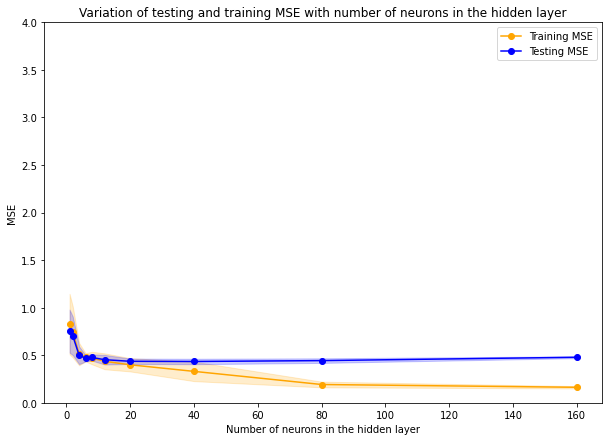

[0.8273271  0.74467967 0.51174743 0.47855832 0.4705949  0.43622103
 0.39939473 0.33043825 0.19235509 0.163046  ]
[0.75360067 0.70414272 0.4994234  0.46822096 0.4766174  0.45308589
 0.43625727 0.43438843 0.44349801 0.47875214]


In [59]:
import json

import numpy as np
from sklearn.preprocessing import scale

#from HW2_NN_regression import ex_3_1_a, ex_3_1_b, ex_3_1_c, ex_3_1_d
with open('data.json', 'r') as f:
    raw_data = json.load(f)

data = {}
# Convert arrays in the raw_data to numpy arrays
for key, value in raw_data.items():
    data[key] = scale(np.array(value))

# Let's reduce the size
data['x_test'] = data['x_test'][0:10000:10]
data['y_test'] = data['y_test'][0:10000:10]

rg = np.random.RandomState(200)
data['y_test'] = data['y_test'] + rg.randn(1000, 1) * .2

data['x_train'] = data['x_train'][0:60:3]
data['y_train'] = data['y_train'][0:60:3]

data['y_train'] = data['y_train'] + rg.randn(20, 1) * .2
x_train, x_test, y_train, y_test = \
data['x_train'], data['x_test'], data['y_train'].ravel(), data['y_test'].ravel()

ex_3_1_c(x_train, x_test, y_train, y_test)

In [57]:
train = [0.85353926, 0.72228918, 0.54016993, 0.47763431, 0.45892767 ,0.43249632 ,0.39802915 ,0.29428942, 0.19439077, 0.16372449]
i=0
hidden_neurons = np.array([1,2,4,6,8,12,20,40,80,160])
test = [0.77197596, 0.67746218 ,0.52719583, 0.48296174, 0.47118232, 0.45673415 ,0.44352101, 0.42674963, 0.44426327, 0.47389394]
for nh in hidden_neurons:
    print("Test MSE for nh = {}: {}".format(nh, test[i]))
    i+=1

Test MSE for nh = 1: 0.77197596
Test MSE for nh = 2: 0.67746218
Test MSE for nh = 4: 0.52719583
Test MSE for nh = 6: 0.48296174
Test MSE for nh = 8: 0.47118232
Test MSE for nh = 12: 0.45673415
Test MSE for nh = 20: 0.44352101
Test MSE for nh = 40: 0.42674963
Test MSE for nh = 80: 0.44426327
Test MSE for nh = 160: 0.47389394


In [19]:
from sklearn.metrics import confusion_matrix, mean_squared_error

from sklearn.neural_network import MLPClassifier
from HW2_NN_classification_plot import plot_hidden_layer_weights, plot_boxplot, plot_image
import numpy as np

import numpy as np

from HW2_NN_classification import ex_3_2
from HW2_NN_classification_plot import plot_image, plot_random_images

"""
Assignment 2: Neural networks
Part 3.2: Classification with Neural Networks: Fashion MNIST

This file contains the code to load the data and contains the top level code for various parts of the assignment.

"""


def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784) / 255.

    return images, labels


"""
Assignment 2: Neural networks
Part 3.2: Classification with Neural Networks: Fashion MNIST

This file contains functions to train and test the neural networks corresponding the the questions in the assignment,
as mentioned in comments in the functions.
Fill in all the sections containing TODOs.
"""


def ex_3_2(X_train, y_train, X_test, y_test):
    """
    Snippet for exercise 3.2
    :param X_train: Train set
    :param y_train: Targets for the train set
    :param X_test: Test set
    :param y_test: Targets for the test set
    :return:
    """
    n_hidd = 120
    i = 0
    acc_test = np.zeros(5) 
    acc_train = np.zeros(5)
    seeds = np.random.randint(0,1000,size=1)
    #seed = np.random.randint(0,1000,size=1)
    for seed in seeds:
        model = MLPClassifier(hidden_layer_sizes=(n_hidd,), activation='tanh', max_iter=50,random_state=seed)
        trained_model = model.fit(X_train,y_train)
        acc_test[i] = trained_model.score(X_test, y_test)
        print(acc_test[i])
        acc_train[i] = trained_model.score(X_train, y_train)
        print(acc_train[i])
        i+=1
        
    print(acc_test)
    print(acc_train)
    
    #plot_hidden_layer_weights(trained_model.coefs_)

    ## TODO
    return trained_model

In [20]:
X_train, y_train = load_mnist('data', kind='train')
X_test, y_test = load_mnist('data', kind='t10k')

## Plot some random images
#plot_random_images(X_train)
## End plot some random images

## 3.2
kk = ex_3_2(X_train, y_train, X_test, y_test)


C:\Users\woege\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8864
0.9612833333333334
[0.8864 0.     0.     0.     0.    ]
[0.96128333 0.         0.         0.         0.        ]


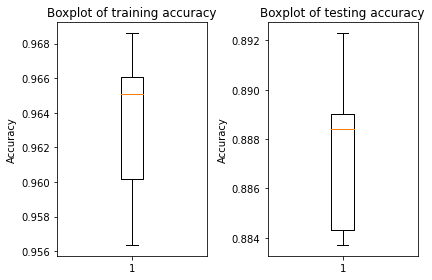

In [2]:
plot_boxplot([0.96861667 ,0.95635  ,  0.96015   , 0.9661    , 0.96508333],[0.8884, 0.8837 ,0.8843, 0.8923, 0.889 ])

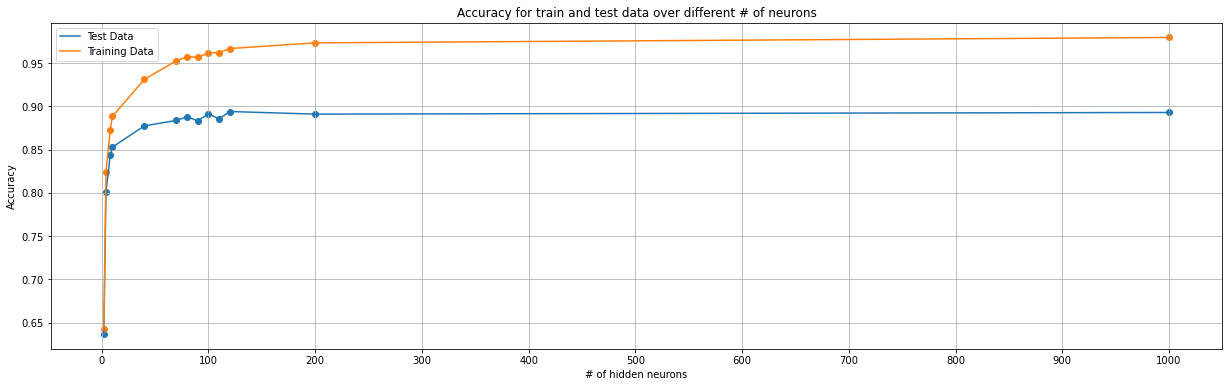

In [84]:
from matplotlib import pyplot as plt
nh =[2,4,8,10,40,70,80,90,100,110,120,200,1000]
    

y=np.array([[0.6369,0.6425],[0.8012,0.8245666666666667],[0.8434,0.872583333333333],
[0.853,0.8885333333333333],[0.8775,0.9313166666666667],[0.8838,0.9528166666666666],[0.888,0.9575],
[0.8833,0.9568666666666666],[0.8913,0.9616833333333333],[0.8857,0.9622333333333334],
[0.8941,0.9669166666666666],[0.8911,0.9734833333333334],[0.893,0.9797166666666667]])

plt.figure(figsize=[21,6])
plt.plot(nh,np.transpose(y)[0])
plt.plot(nh,np.transpose(y)[1])
plt.scatter(nh,np.transpose(y)[0])
plt.scatter(nh,np.transpose(y)[1])

plt.legend(["Test Data","Training Data"])
plt.xticks([0,100,200,300,400,500,600,700,800,900,1000])
plt.xlabel("# of hidden neurons")
plt.ylabel("Accuracy")
plt.title("Accuracy for train and test data over different # of neurons")
plt.grid()
plt.savefig("acc_neu.pdf")

In [84]:
 %matplotlib qt
#%matplotlib inline
plot_hidden_layer_weights(kk.coefs_[0])

In [29]:
y_pred=kk.predict(X_test)
a=confusion_matrix(y_test, y_pred)

In [30]:
def bmatrix(a):
    text = r'$\left[\begin{array}{*{'
    text += str(len(a[0]))
    text += r'}c}'
    text += '\n'
    for x in range(len(a)):
        for y in range(len(a[x])):
            text += str(a[x][y])
            text += r' & '
        text = text[:-2]
        text += r'\\'
        text += '\n'
    text += r'\end{array}\right]$'

    print(text)
bmatrix(a)

$\left[\begin{array}{*{10}c}
760 & 2 & 12 & 19 & 3 & 1 & 195 & 0 & 8 & 0 \\
3 & 975 & 1 & 14 & 2 & 0 & 3 & 0 & 2 & 0 \\
12 & 1 & 808 & 10 & 76 & 1 & 89 & 1 & 2 & 0 \\
15 & 3 & 8 & 892 & 36 & 1 & 42 & 0 & 3 & 0 \\
0 & 1 & 93 & 26 & 828 & 0 & 50 & 0 & 2 & 0 \\
0 & 0 & 0 & 1 & 0 & 949 & 0 & 22 & 1 & 27 \\
57 & 4 & 63 & 27 & 76 & 0 & 770 & 0 & 3 & 0 \\
0 & 0 & 0 & 0 & 0 & 13 & 0 & 964 & 0 & 23 \\
4 & 0 & 3 & 5 & 7 & 5 & 12 & 4 & 958 & 2 \\
0 & 0 & 0 & 0 & 0 & 6 & 1 & 33 & 0 & 960 \\
\end{array}\right]$


In [92]:
num_plot = 1
y_pred = kk.predict(X_test)


true_det = np.equal(y_pred,y_test)
false_det = np.invert(true_det)
false_det = false_det.nonzero()[0]
true_det = true_det.nonzero()[0]

"""for i in range(num_plot):
    idx = np.random.randint(0,len(false_det)-1)
    plot_image(X_test[idx])"""

for i in range(num_plot):
    idx = np.random.randint(0,len(false_det)-1)
    plot_image(X_test[idx])
    

In [93]:
idx

44